In [167]:
!pip install -U kaleido

In [2]:
import pandas as pd
import pandana, time, os, pandas as pd, numpy as np
from pandana.loaders import osm
from shapely.geometry import Polygon, Point

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../helper_scripts')
from run_settings import settings

In [5]:
import geopandas
import geojson 

polygons_df = geopandas.read_file(f'../geojson_files/dk_pop_100m_polygons.geojson')

polygons_df.head(1)

,population_density,lon,lat,id,geometry
0,1.206668,10.600833,57.743333,0,"POLYGON ((10.60042 57.74292, 10.60125 57.74292..."


In [6]:
df = pd.read_csv("../cph_pop_and_access_1k.csv")


In [7]:
df.head(1)

,id,lon,lat,population_density,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
0,55246,12.527917,55.695417,8509.044922,826.561404,920.052632,1000.0,939.964912,1000.0,813.596491


In [4]:
bbox = settings["bbox"]
bbox_min_lon = bbox[0]
bbox_min_lat = bbox[1]
bbox_max_lon = bbox[2]
bbox_max_lat = bbox[3]

bbox

[12.308, 55.5416, 12.7096, 55.7761]

In [9]:
from PandanaHandler import getAccessibilityMeasures

access_df = getAccessibilityMeasures(bbox = [bbox[1], bbox[0], bbox[3], bbox[2]])

access_df

[55.5416, 12.308, 55.7761, 12.7096]
1,745 POIs loaded from CSV in 0.08 seconds
Network with 114,676 nodes loaded from HDF5 in 6.11 secs
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()


,x,y,restaurant_distance,bar_distance,school_distance,toilets_distance,college_distance,hospital_distance
id,,,,,,,,
118725,12.562906,55.673985,95.097000,130.087997,162.432999,172.011002,1462.474976,3240.991943
118744,12.560034,55.661718,213.123001,639.276001,958.510986,132.541000,2062.851074,4431.404785
118759,12.553866,55.657275,859.354004,551.741028,1591.228027,1172.400024,2199.524902,5000.000000
118763,12.542231,55.654003,246.557999,246.557999,1676.405029,1306.796997,1736.375000,4663.698242
118764,12.542389,55.653946,258.287994,258.287994,1688.135010,1318.526978,1748.104980,4675.428223
...,...,...,...,...,...,...,...,...
9220714454,12.495532,55.732897,954.965027,2087.603027,1270.296997,1492.201050,4048.833008,3782.351074
9220714455,12.495603,55.732942,948.232971,2080.871094,1263.564941,1485.468994,4042.101074,3775.618896
9220714467,12.496371,55.735019,1051.542969,1927.082031,1130.816040,1179.994995,4242.561035,3827.092041


In [8]:
import importlib
from PandanaHandler import getPOIs
importlib.reload(sys.modules['PandanaHandler'])
from PandanaHandler import getPOIs

pois_df = getPOIs(bbox = [bbox[1], bbox[0], bbox[3], bbox[2]])

pois_df.head(1)

,lat,lon,amenity,cuisine,fvst:navnelbnr,microbrewery,name,opening_hours,phone,website,...,payment:gift_card,lgbtq,grades,name:da,instagram,undefined,drink:cider,drink:gin,drink:cocktails,product
id,,,,,,,,,,,,,,,,,,,,,
1342135535,55.715615,12.565832,hospital,NaN,NaN,NaN,Børneneurologisk Behandlingsklinik,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2244465736,55.753611,12.571778,hospital,NaN,124502,NaN,Privathospitalet Danmark,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2381056950,55.764503,12.519366,hospital,NaN,NaN,NaN,Københavns Privathospital,Mo-Fr 8:00-15:30,+45 45933933,http://www.kbhprivat.dk/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554166029,55.716884,12.540205,hospital,NaN,NaN,NaN,Psykiatrisk akutmodtagelse,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554189647,55.685837,12.521800,hospital,NaN,NaN,NaN,Psykiatrisk akutmodtagelse,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554189876,55.686151,12.520995,hospital,NaN,NaN,NaN,Psykiatrisk Center Frederiksberg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554222099,55.672805,12.389232,hospital,NaN,NaN,NaN,Psykiatrisk akutmodtagelse,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554229961,55.687285,12.525789,hospital,NaN,NaN,NaN,Akutklinik,07:00-22:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2555265973,55.670262,12.389223,hospital,NaN,NaN,NaN,Rigshospitalet - Glostrup,NaN,NaN,https://www.glostruphospital.dk/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
bbox_polygon = Polygon([
                        [bbox[0], bbox[1]],
                        [bbox[0], bbox[3]],
                        [bbox[2], bbox[3]],
                        [bbox[2], bbox[1]],
                        [bbox[0], bbox[1]]
                    ])
bbox_polygon

temp_df =  polygons_df[polygons_df.geometry.within(bbox_polygon)]

temp_df

,population_density,lon,lat,id,geometry
404935,6.256752,12.315833,55.775000,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458..."
404936,6.607995,12.316667,55.775000,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458..."
404937,6.797835,12.319167,55.775000,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458..."
404938,6.738600,12.320000,55.775000,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458..."
404939,6.722388,12.320833,55.775000,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458..."
...,...,...,...,...,...
556543,1.806146,12.596667,55.557500,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708..."
556872,2.767010,12.585833,55.556667,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625..."
556873,2.241621,12.586667,55.556667,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625..."
556874,2.739544,12.588333,55.556667,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625..."


In [14]:
small_lon_min = 12.54
small_lon_max = 12.62
small_lat_min = 55.679
small_lat_max = 55.699

small_bbox_polygon = Polygon([
                        [small_lon_min, small_lat_min],
                        [small_lon_min, small_lat_max],
                        [small_lon_max, small_lat_max],
                        [small_lon_max, small_lat_min],
                        [small_lon_min, small_lat_min]
                    ])
within_small = temp_df[temp_df.geometry.within(small_bbox_polygon)] #within_df.geometry.iloc[[i for i in range(5000, 5100)]]


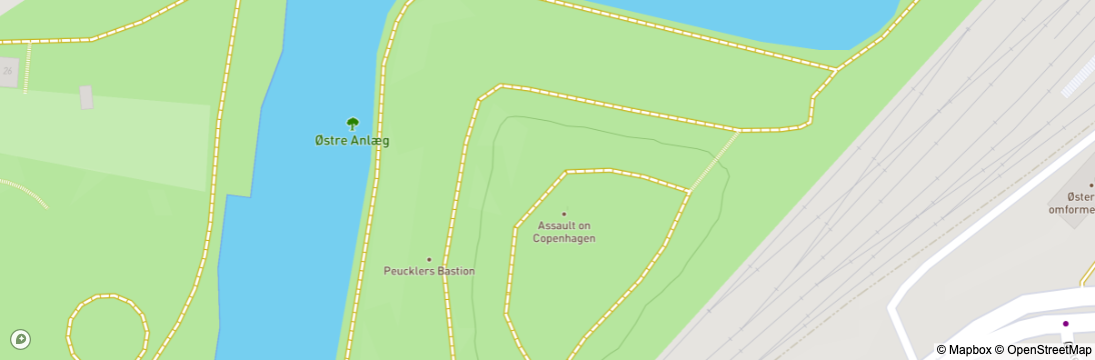

In [214]:
import plotly.express as px
import json
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

width = 0.000833 / 2

selected = within_small.iloc[[i for i in range(500, 1000)]]

osm_nodes_within = access_df[
    (access_df.x > selected.lon.min() - width) & 
    (access_df.x < selected.lon.max() + width) &
    (access_df.y > selected.lat.min() - width) &
    (access_df.y < selected.lat.max() + width)
]




px.set_mapbox_access_token(open("../.mapbox_token").read())
fig = px.scatter_mapbox(
        osm_nodes_within.head(1),
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="x", lat="y", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
#        width=,
        color='bar_distance',
        color_continuous_scale="Bluered",#"Inferno_r", #viridis reversed
        #color_discrete_sequence=['grey'],
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "outdoors",
        'center': { 'lon': selected.lon.mean(), 'lat':  selected.lat.mean()},
        'zoom': 14, 'layers': [
            {
                'source': {
                    'type': "FeatureCollection",
                    'features': []#list(map(lambda x: {'type': 'Feature', "geometry": {'type': 'Polygon', 'coordinates':x["geometry"]["coordinates"]}}, json.loads(selected["geometry"].to_json())["features"]))
                },
                'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"
                },
        ]
    },
    margin = {'l':0, 'r':0, 'b':0, 't':0},
    coloraxis_showscale=False)



In [195]:
from GeodataHelper import haversine

haversine(within_small.lon.values[0], within_small.lat.values[0], within_small.lon.values[1], within_small.lat.values[1]) * 1000

52.231057284672076

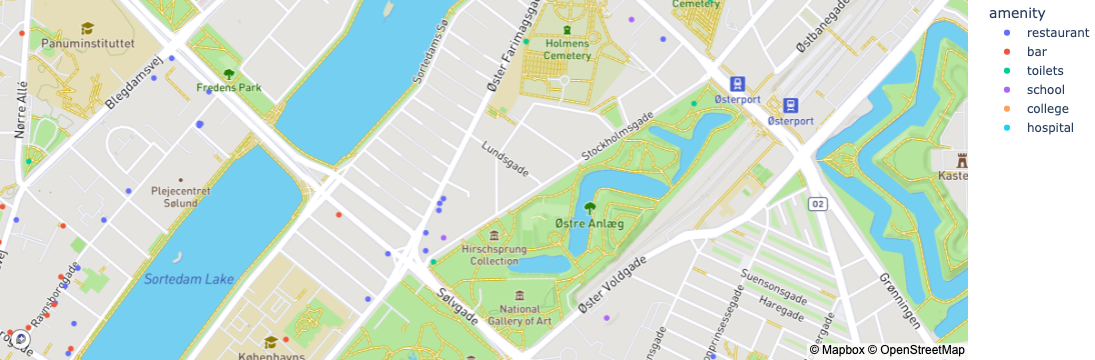

In [219]:
import plotly.express as px
import json
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

width = 0.000833 / 2

selected = within_small.iloc[[i for i in range(500, 1000)]]

osm_nodes_within = access_df[
    (access_df.x > selected.lon.min() - width) & 
    (access_df.x < selected.lon.max() + width) &
    (access_df.y > selected.lat.min() - width) &
    (access_df.y < selected.lat.max() + width)
]




px.set_mapbox_access_token(open("../.mapbox_token").read())
fig = px.scatter_mapbox(
        pois_df,
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
#        width=,
        color='amenity',
        #color_continuous_scale="Bluered",#"Inferno_r", #viridis reversed
        #color_discrete_sequence=[''],
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "outdoors",
        'center': { 'lon': selected.lon.mean(), 'lat':  selected.lat.mean()},
        'zoom': 14, 'layers': [
            {
                'source': {
                    'type': "FeatureCollection",
                    'features': []#list(map(lambda x: {'type': 'Feature', "geometry": {'type': 'Polygon', 'coordinates':x["geometry"]["coordinates"]}}, json.loads(selected["geometry"].to_json())["features"]))
                },
                'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"
                },
        ]
    },
    margin = {'l':0, 'r':0, 'b':0, 't':0},
    coloraxis_showscale=False)



In [1]:
import geopandas
import geojson 

polygons_df = geopandas.read_file(f'../dk_100m_clean4.json')

polygons_df

,lon,lat,population_density,id,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist,geometry
0,10.600833,57.743333,1.206668,0,1,2329.613037,2722.680908,4084.447998,2048.761963,5000.0,5000.0,2329.613037,2722.680908,4084.447998,2048.761963,5000.0,5000.0,"POLYGON ((10.60042 57.74292, 10.60125 57.74292..."
1,10.601667,57.743333,0.982903,1,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2379.068178,2772.136049,4133.903138,2098.217103,5000.0,5000.0,"POLYGON ((10.60125 57.74292, 10.60208 57.74292..."
2,10.633333,57.743333,0.970523,2,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,541.824860,3626.752785,4933.032570,533.750860,5000.0,5000.0,"POLYGON ((10.63292 57.74292, 10.63375 57.74292..."
3,10.630833,57.740833,1.223284,3,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,315.918789,3400.846714,4707.126499,307.844789,5000.0,5000.0,"POLYGON ((10.63042 57.74042, 10.63125 57.74042..."
4,10.595833,57.740000,1.048370,4,1,1842.947021,2163.959961,3525.727051,2009.296021,5000.0,5000.0,1842.947021,2163.959961,3525.727051,2009.296021,5000.0,5000.0,"POLYGON ((10.59542 57.73958, 10.59625 57.73958..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838576,11.940833,54.569167,0.870005,846588,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,735.681016,1274.879991,5000.000000,132.522043,5000.0,5000.0,"POLYGON ((11.94042 54.56875, 11.94125 54.56875..."
838577,11.951667,54.569167,0.815470,846589,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1386.308847,1925.507822,5000.000000,783.149873,5000.0,5000.0,"POLYGON ((11.95125 54.56875, 11.95208 54.56875..."
838578,11.972500,54.568333,0.536970,846590,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,"POLYGON ((11.97208 54.56792, 11.97292 54.56792..."
838579,11.951667,54.565833,0.565375,846591,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1511.908704,2051.107679,5000.000000,908.749730,5000.0,5000.0,"POLYGON ((11.95125 54.56542, 11.95208 54.56542..."


In [4]:
reduced = polygons_df[["lon", "lat", "population_density", "osm_node_count", "avg_restaurant_dist", "avg_bar_dist", "avg_school_dist", "avg_toilets_dist", "avg_college_dist", "avg_hospital_dist", "geometry"]]

In [5]:
reduced.to_file("../dk_100m_reduced.json", driver="GeoJSON")

In [22]:

import plotly.express as px
import json
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

width = 0.000833 / 2

selected = within_small.iloc[[i for i in range(500, 1000)]]

osm_nodes_within = access_df[
    (access_df.x > selected.lon.min() - width) & 
    (access_df.x < selected.lon.max() + width) &
    (access_df.y > selected.lat.min() - width) &
    (access_df.y < selected.lat.max() + width)
]




px.set_mapbox_access_token(open("../.mapbox_token").read())
fig = px.scatter_mapbox(
        osm_nodes_within.head(1),
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="x", lat="y", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
#        width=,
        color='bar_distance',
        color_continuous_scale="Bluered",#"Inferno_r", #viridis reversed
        #color_discrete_sequence=['grey'],
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "outdoors",
        'center': { 'lon': selected.lon.mean(), 'lat':  selected.lat.mean()},
        'zoom': 14, 'layers': [
            {
                'sourcetype': 'geojson',
                'source': {
                'type': 'vector',
                'url': 'mapbox://goodgame.b6470sos'
                },
                'sourcelayer': 'dk_100m_cleaned4_coalesce', 
                'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"
                },
        ]
    },
    margin = {'l':0, 'r':0, 'b':0, 't':0},
    coloraxis_showscale=False)

